In [2]:
# Use the Azure Machine Learning data preparation package
from azureml.dataprep import package

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()


In [3]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on


In [4]:
# This call will load the referenced package and return a DataFrame.
# If run in a PySpark environment, this call returns a
# Spark DataFrame. If not, it returns a Pandas DataFrame.
df = package.run('Data analysis.dprep', dataflow_idx=0)

# Remove this line and add code that uses the DataFrame
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,2014-05-12,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,2014-06-27,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,2015-01-15,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,2015-04-15,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,2015-03-12,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

## Correlation between square footage above ground and price

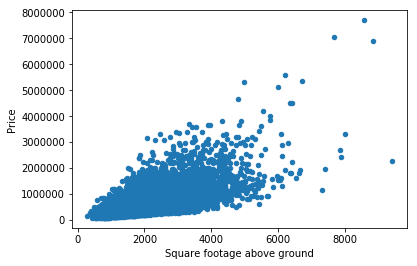

In [7]:
df.plot.scatter('sqft_above', 'price')
plt.xlabel('Square footage above ground')
plt.ylabel('Price')
plt.show()

## Correlation between # bedrooms and price

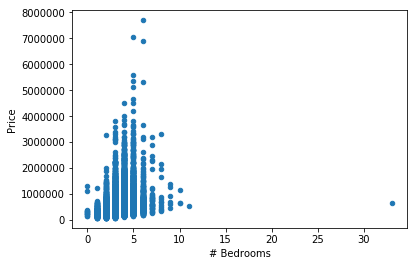

In [8]:
df.plot.scatter('bedrooms', 'price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price')
plt.show()

## Correlation between # badrooms and price

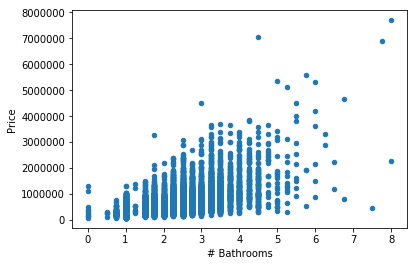

In [12]:
df.plot.scatter('bathrooms', 'price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price')
plt.show()

## Correlation between grade and price

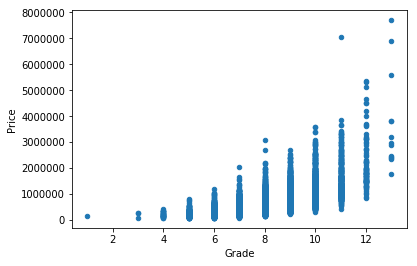

In [13]:
df.plot.scatter('grade', 'price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

## Correlation between rennovation and price

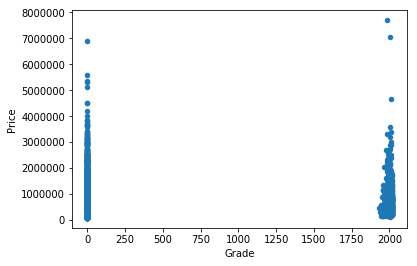

In [14]:
df.plot.scatter('yr_renovated', 'price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

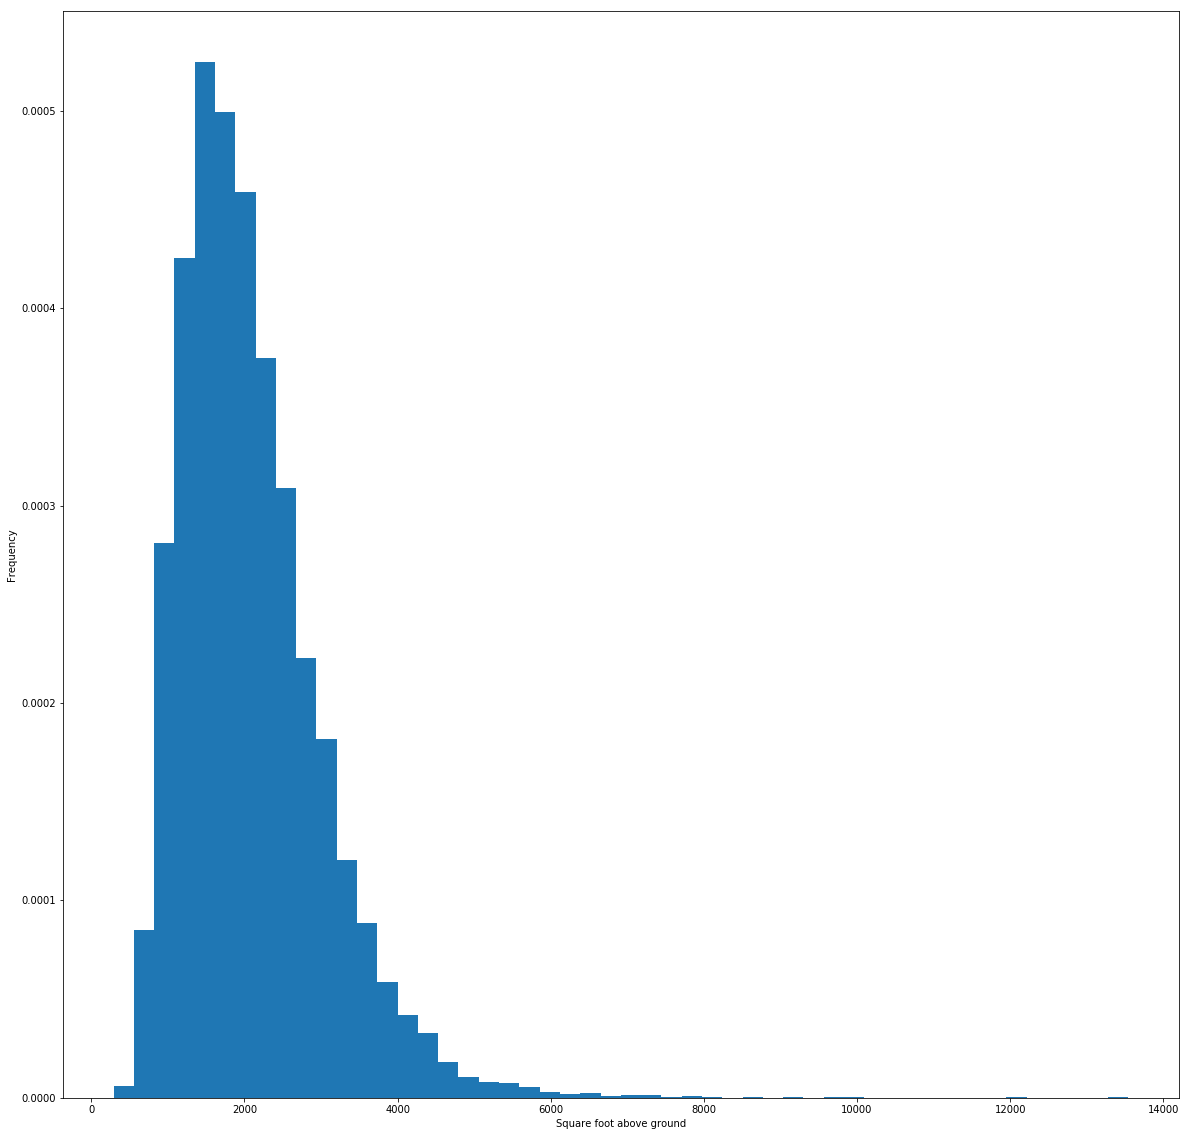

In [17]:
df['sqft_living'].plot.hist(bins=50, normed=True)
plt.xlabel('Square foot above ground')
plt.show()

In [17]:
df['sqft_above'].quantile([0.025, 0.975])

0.025     770.0
0.975    3830.0
Name: sqft_above, dtype: float64

## Plotting the ECDF
The [Emperical Cumulative Distribution Function](https://en.wikipedia.org/wiki/Empirical_distribution_function) (ECDF) is an alternative model to express the distribution of values in a feature of our dataset. To calculate the ECDF you need the function defined below.

In [18]:
def ecdf(series):
    import numpy as np
    
    sq = series.value_counts()
    return sq.sort_index().cumsum()*1./len(sq)

To use the ECDF you can use the following code. It takes the features `sqft_above`, runs it through the ECDF function and then plots it using matplotlib. We then label the axes and show the plot.

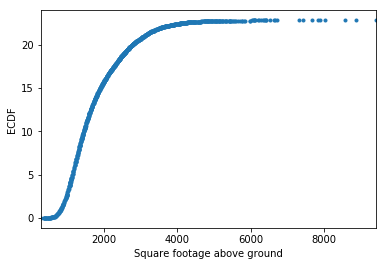

In [19]:
ecdf(df['sqft_above']).plot(marker='.', linestyle='none')
plt.xlabel('Square footage above ground')
plt.ylabel('ECDF')
plt.show()

## The pearson correlation coefficient
The pearson correlation coefficient expresses how strong of a linear relationship there is between different features. We can use this in linear regression models to find out which feature is most likely useful for our model.

Execute the code below to plot a heatmap with the different values for the pearson correlation coefficient.
Try to spot which features are useful and which are not.

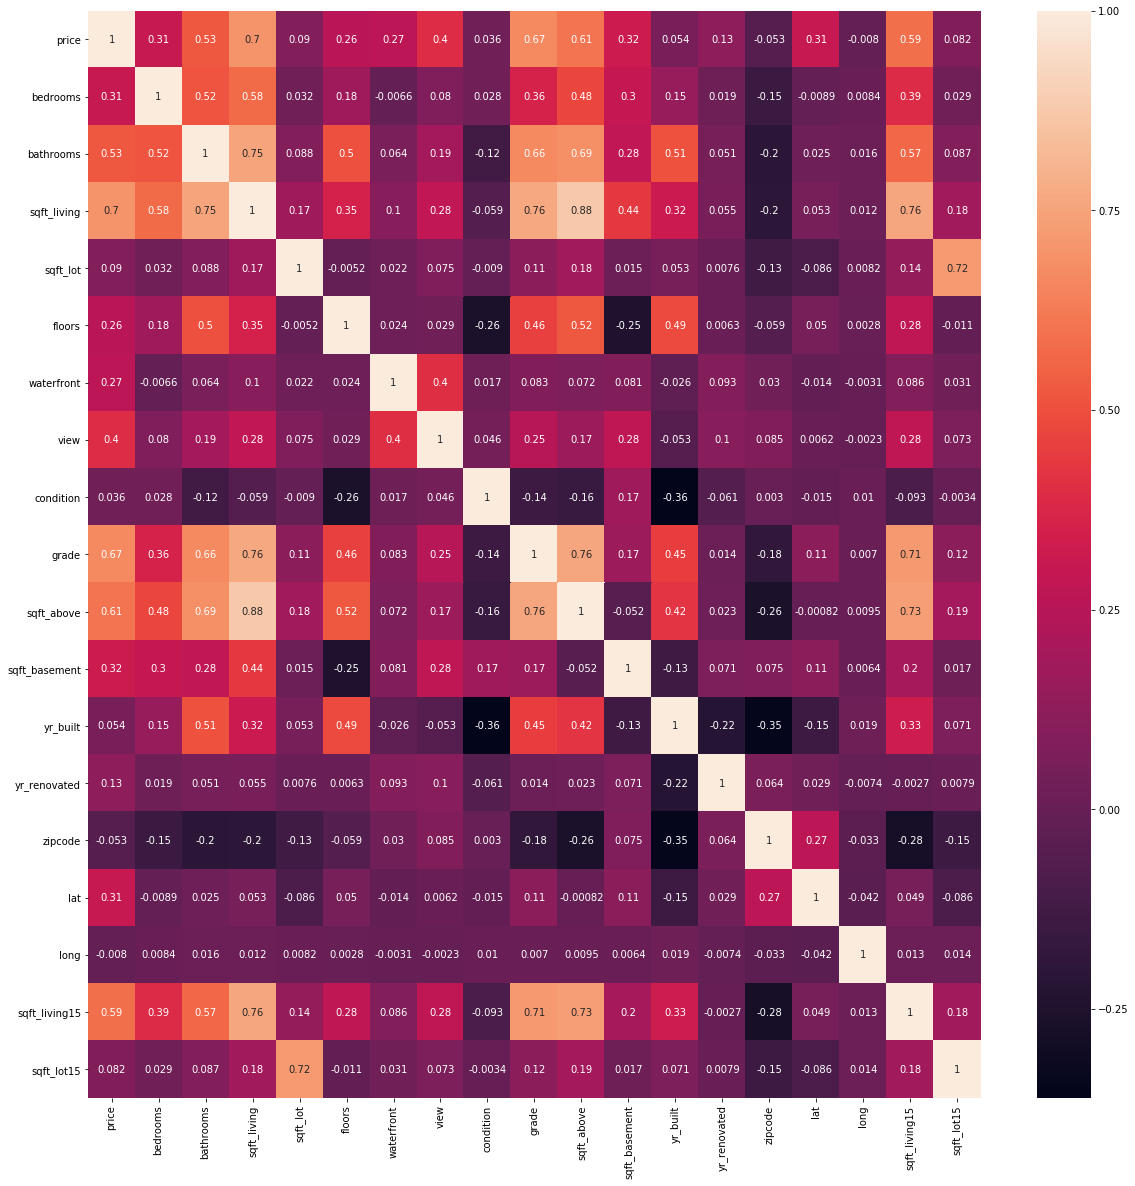

In [16]:
import seaborn as sns

corr = df.corr(method='pearson')

plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(corr, annot=True)